In [1016]:
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
from functools import reduce

np.set_printoptions(precision=2)
np.set_printoptions(suppress=True)

In [498]:
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)


In [41]:
congress_dist_df = pd.read_excel('~/Downloads/10L_VetPop2018_116th_Congress.xlsx')

In [49]:
congress_dist_df.shape

(495, 5)

In [178]:
cong_dist_df =congress_dist_df.loc[[84,85,86,87,88,89,90,91]]
cong_dist_df

,Unnamed: 0,Unnamed: 1,"Table 10L: VETPOP2018 LIVING VETERANS BY 116th CONGRESSIONAL DISTRICT, STATE, AGE GROUP, GENDER, 2018-2048",Unnamed: 3,Unnamed: 4
84,Colorado,CD 1,24812.9,18173.3,42986.2
85,NaN,CD 2,24093.9,22507.2,46601
86,NaN,CD 3,26430.8,28426.8,54857.6
87,NaN,CD 4,27276.1,22528.7,49804.8
88,NaN,CD 5,74491.4,32573.9,107065
89,NaN,CD 6,31113.1,19593,50706
90,NaN,CD 7,25868,22940.1,48808.1
91,Colorado Total,NaN,234086,166743,400829


In [188]:
cong_dist_df1 =cong_dist_df.reset_index().drop(['index'], axis=1)
cong_dist_df1

,Unnamed: 0,Unnamed: 1,"Table 10L: VETPOP2018 LIVING VETERANS BY 116th CONGRESSIONAL DISTRICT, STATE, AGE GROUP, GENDER, 2018-2048",Unnamed: 3,Unnamed: 4
0,Colorado,CD 1,24812.9,18173.3,42986.2
1,NaN,CD 2,24093.9,22507.2,46601
2,NaN,CD 3,26430.8,28426.8,54857.6
3,NaN,CD 4,27276.1,22528.7,49804.8
4,NaN,CD 5,74491.4,32573.9,107065
5,NaN,CD 6,31113.1,19593,50706
6,NaN,CD 7,25868,22940.1,48808.1
7,Colorado Total,NaN,234086,166743,400829


In [257]:
cong_dist_df1 =cong_dist_df1.transpose().reset_index().drop(['index'], axis=1)
cong_dist_df1

,0,1,2,3,4,5,6,7
0,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,NaN
2,24812.9,24093.9,26430.8,27276.1,74491.4,31113.1,25868,234086
3,18173.3,22507.2,28426.8,22528.7,32573.9,19593,22940.1,166743
4,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [259]:
cong_dist_df1.transpose()

,0,1,2,3,4
0,Colorado,CD 1,24812.9,18173.3,42986.2
1,NaN,CD 2,24093.9,22507.2,46601
2,NaN,CD 3,26430.8,28426.8,54857.6
3,NaN,CD 4,27276.1,22528.7,49804.8
4,NaN,CD 5,74491.4,32573.9,107065
5,NaN,CD 6,31113.1,19593,50706
6,NaN,CD 7,25868,22940.1,48808.1
7,Colorado Total,NaN,234086,166743,400829


In [271]:
cong_dist_df1

,0,1,2,3,4,5,6,7
0,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,NaN
2,24812.9,24093.9,26430.8,27276.1,74491.4,31113.1,25868,234086
3,18173.3,22507.2,28426.8,22528.7,32573.9,19593,22940.1,166743
4,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [275]:
cong_dist_df1 =cong_dist_df1.loc[[0,1,4],:]
cong_dist_df1

,0,1,2,3,4,5,6,7
0,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,NaN
4,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [323]:
cg1=cong_dist_df1.reset_index()
cg1

,index,0,1,2,3,4,5,6,7
0,0,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Colorado Total
1,1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,NaN
2,4,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [331]:
cg1=cg1.drop(['index'],axis=1)
cg1

,0,1,2,3,4,5,6,7
0,Colorado,NaN,NaN,NaN,NaN,NaN,NaN,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,NaN
2,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [332]:
cg1=cg1.replace(np.nan, '', regex=True)
cg1

,0,1,2,3,4,5,6,7
0,Colorado,,,,,,,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
2,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [43]:
ethnic_state_vet_df=pd.read_excel('~/Downloads/8L_VP2018_Race_Ethnicity_State.xlsx')

In [50]:
ethnic_state_df.shape

(59, 11)

In [147]:
co_ethnic =ethnic_state_df.loc[[4, 10], :]

In [280]:
co_ethnic=co_ethnic.transpose().reset_index().drop(['index'],axis=1)
co_ethnic

,4,10
0,State,Colorado
1,All Veterans,400829
2,"White, alone",346991
3,"Black or African American, alone",24846.5
4,"American Indian and Alaska Native, alone",3237.39
5,"Asian, alone",5888.92
6,"Native Hawaiian and Other Pacific Islander, alone",936.752
7,"Some other race, alone",8970.74
8,Two or more races,9957.55
9,Hispanic or Latino (of any race),45190.1


In [301]:
co_ethnic=co_ethnic.transpose().reset_index().drop(['index'], axis=1)
co_ethnic.transpose()

,0,1,2,3,4,5,6,7,8,9,10
0,State,All Veterans,"White, alone","Black or African American, alone","American Indian and Alaska Native, alone","Asian, alone","Native Hawaiian and Other Pacific Islander, alone","Some other race, alone",Two or more races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino"
1,Colorado,400829,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014


In [302]:
co_ethnic.shape

(11, 2)

In [308]:
co_ethnic=co_ethnic.transpose()
co_ethnic

,0,1,2,3,4,5,6,7,8,9,10
0,State,All Veterans,"White, alone","Black or African American, alone","American Indian and Alaska Native, alone","Asian, alone","Native Hawaiian and Other Pacific Islander, alone","Some other race, alone",Two or more races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino"
1,Colorado,400829,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014


In [314]:
co_ethnic

,0,1,2,3,4,5,6,7,8,9,10
0,State,All Veterans,"White, alone","Black or African American, alone","American Indian and Alaska Native, alone","Asian, alone","Native Hawaiian and Other Pacific Islander, alone","Some other race, alone",Two or more races,Hispanic or Latino (of any race),"White alone, Not Hispanic or Latino"
1,Colorado,400829,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014


In [296]:
county_vet_df= pd.read_excel('~/Downloads/9L_VetPop2018_County.xlsx')

In [103]:
metro_county_df =county_vet_df.loc[[250,266,280,271, 310]]

In [108]:
metro_county_df.reset_index().shape

(5, 34)

In [117]:
dvr_cos =metro_county_df.transpose().reset_index().loc[[1,2,3,4,5]]

In [129]:
dnvr_cos =dvr_cos.transpose().reset_index().loc[[1,2,3,4,5]]
dnvr_cos.shape

(5, 6)

In [157]:
dnvr_cos.reset_index()

,index,1,2,3,4,5
0,1,"Adams,CO",29066.7,28640.4,28245.6,27779.4
1,2,"Denver,CO",34896.6,34075.8,33320.3,32520.4
2,3,"Jefferson,CO",38971.9,38684.1,38417.9,38096.3
3,4,"El Paso,CO",96184.2,95058.4,94003.9,92890.5
4,5,"Teller,CO",2939.21,2910.73,2863.58,2830.09


In [160]:
dnvr_cos 


,1,2,3,4,5
1,"Adams,CO",29066.7,28640.4,28245.6,27779.4
2,"Denver,CO",34896.6,34075.8,33320.3,32520.4
3,"Jefferson,CO",38971.9,38684.1,38417.9,38096.3
4,"El Paso,CO",96184.2,95058.4,94003.9,92890.5
5,"Teller,CO",2939.21,2910.73,2863.58,2830.09


In [392]:
cdf2= pd.read_csv('~/Downloads/QuickFacts Oct-26-2020-2.csv')
cdf2=cdf2.loc[[0,1,2,8,9,10,11,12,13,14,15,16]]

In [632]:
cdf2=cdf2.transpose()

In [633]:
cdf2


,"Teller County, Colorado","Denver County, Colorado","Adams County, Colorado","Jefferson County, Colorado","El Paso County, Colorado",Colorado,United States
Population est. for July 2019,"25,388","727,211","517,421","582,881","720,403","5,758,736","328,239,523"
"White alone, %",93.8%,80.9%,85.7%,91.5%,83.3%,86.9%,76.3%
"Black or African American alone, %",1.0%,9.8%,4.0%,1.5%,6.9%,4.6%,13.4%
"American Indian/Alaska Native alone, %",1.4%,1.7%,2.3%,1.2%,1.4%,1.6%,1.3%
"Asian alone, %",1.1%,4.1%,4.5%,3.1%,3.1%,3.5%,5.9%
"Native Hawaiian/Pacific Islander alone, %",0.1%,0.2%,0.2%,0.1%,0.4%,0.2%,0.2%
"Two or More Races, %",2.6%,3.3%,3.2%,2.6%,4.9%,3.1%,2.8%
"Hispanic/Latino, %",7.1%,29.3%,40.8%,15.6%,17.7%,21.8%,18.5%
"White alone, not Hispanic/Latino, %",88.0%,54.9%,49.0%,77.7%,68.6%,67.7%,60.1%
Veterans est./2014-2018,"3,073","29,648","26,733","38,191","83,973","375,746","18,611,432"


In [634]:
co_ethnic

,Population Numbers
"White, alone",346991
"Black or African American, alone",24846.5
"American Indian/Alaska Native, alone",3237.39
"Asian, alone",5888.92
"Native Hawaiian/Pacific Islander, alone",936.752
"Some other Race, alone",8970.74
Two or more races,9957.55
Hispanic/Latino (of any race),45190.1
"White alone, Not Hispanic/Latino",315014
All Veterans,400829


In [635]:
co_ethnic.shape

(10, 1)

In [381]:
co_ethnic=co_ethnic.loc[[0,2,3,4,5,6,7,8,9,10,1]]

In [384]:
co_ethnic=co_ethnic.reset_index().drop(['index'], axis=1)

In [636]:
cdf2.dtypes

Teller County, Colorado       object
Denver County, Colorado       object
Adams County, Colorado        object
Jefferson County, Colorado    object
El Paso County, Colorado      object
Colorado                      object
United States                 object
dtype: object

In [637]:
cdf3=pd.read_csv('~/Downloads/QuickFacts Oct-26-2020-4.csv')

In [638]:
cdf3 =cdf3.loc[[0,1,2,8,9,10,11,12,13,14,15,16]]


In [639]:
cdf3=cdf3.reset_index().drop(['Fact Note', 'Value Note for Colorado', 'Value Note for United States'], axis=1)

In [640]:
cdf3 =cdf3.drop(['index'], axis=1)


In [641]:
cdf3

,Fact,Colorado,United States
0,"Population estimates, July 1, 2019, (V2019)","5,758,736","328,239,523"
1,"Population estimates base, April 1, 2010, (V2...","5,029,319","308,758,105"
2,"Population, percent change - April 1, 2010 (es...",14.5%,6.3%
3,"White alone, percent",86.9%,76.3%
4,"Black or African American alone, percent",4.6%,13.4%
5,"American Indian and Alaska Native alone, percent",1.6%,1.3%
6,"Asian alone, percent",3.5%,5.9%
7,Native Hawaiian and Other Pacific Islander alo...,0.2%,0.2%
8,"Two or More Races, percent",3.1%,2.8%
9,"Hispanic or Latino, percent",21.8%,18.5%


In [642]:
cdf3=cdf3.drop(['Colorado'],axis=1)


In [645]:
cdf3

,Fact,United States
0,"Population estimates, July 1, 2019, (V2019)","328,239,523"
1,"Population estimates base, April 1, 2010, (V2...","308,758,105"
2,"Population, percent change - April 1, 2010 (es...",6.3%
3,"White alone, percent",76.3%
4,"Black or African American alone, percent",13.4%
5,"American Indian and Alaska Native alone, percent",1.3%
6,"Asian alone, percent",5.9%
7,Native Hawaiian and Other Pacific Islander alo...,0.2%
8,"Two or More Races, percent",2.8%
9,"Hispanic or Latino, percent",18.5%


In [647]:
cdf2

,"Teller County, Colorado","Denver County, Colorado","Adams County, Colorado","Jefferson County, Colorado","El Paso County, Colorado",Colorado,United States
Population est. for July 2019,"25,388","727,211","517,421","582,881","720,403","5,758,736","328,239,523"
"White alone, %",93.8%,80.9%,85.7%,91.5%,83.3%,86.9%,76.3%
"Black or African American alone, %",1.0%,9.8%,4.0%,1.5%,6.9%,4.6%,13.4%
"American Indian/Alaska Native alone, %",1.4%,1.7%,2.3%,1.2%,1.4%,1.6%,1.3%
"Asian alone, %",1.1%,4.1%,4.5%,3.1%,3.1%,3.5%,5.9%
"Native Hawaiian/Pacific Islander alone, %",0.1%,0.2%,0.2%,0.1%,0.4%,0.2%,0.2%
"Two or More Races, %",2.6%,3.3%,3.2%,2.6%,4.9%,3.1%,2.8%
"Hispanic/Latino, %",7.1%,29.3%,40.8%,15.6%,17.7%,21.8%,18.5%
"White alone, not Hispanic/Latino, %",88.0%,54.9%,49.0%,77.7%,68.6%,67.7%,60.1%
Veterans est./2014-2018,"3,073","29,648","26,733","38,191","83,973","375,746","18,611,432"


In [648]:
co_ethnic

,Population Numbers
"White, alone",346991
"Black or African American, alone",24846.5
"American Indian/Alaska Native, alone",3237.39
"Asian, alone",5888.92
"Native Hawaiian/Pacific Islander, alone",936.752
"Some other Race, alone",8970.74
Two or more races,9957.55
Hispanic/Latino (of any race),45190.1
"White alone, Not Hispanic/Latino",315014
All Veterans,400829


In [469]:
co_ethnic.dtypes

0    object
1    object
dtype: object

In [649]:
co_ethnic

,Population Numbers
"White, alone",346991
"Black or African American, alone",24846.5
"American Indian/Alaska Native, alone",3237.39
"Asian, alone",5888.92
"Native Hawaiian/Pacific Islander, alone",936.752
"Some other Race, alone",8970.74
Two or more races,9957.55
Hispanic/Latino (of any race),45190.1
"White alone, Not Hispanic/Latino",315014
All Veterans,400829


In [650]:
cdf2

,"Teller County, Colorado","Denver County, Colorado","Adams County, Colorado","Jefferson County, Colorado","El Paso County, Colorado",Colorado,United States
Population est. for July 2019,"25,388","727,211","517,421","582,881","720,403","5,758,736","328,239,523"
"White alone, %",93.8%,80.9%,85.7%,91.5%,83.3%,86.9%,76.3%
"Black or African American alone, %",1.0%,9.8%,4.0%,1.5%,6.9%,4.6%,13.4%
"American Indian/Alaska Native alone, %",1.4%,1.7%,2.3%,1.2%,1.4%,1.6%,1.3%
"Asian alone, %",1.1%,4.1%,4.5%,3.1%,3.1%,3.5%,5.9%
"Native Hawaiian/Pacific Islander alone, %",0.1%,0.2%,0.2%,0.1%,0.4%,0.2%,0.2%
"Two or More Races, %",2.6%,3.3%,3.2%,2.6%,4.9%,3.1%,2.8%
"Hispanic/Latino, %",7.1%,29.3%,40.8%,15.6%,17.7%,21.8%,18.5%
"White alone, not Hispanic/Latino, %",88.0%,54.9%,49.0%,77.7%,68.6%,67.7%,60.1%
Veterans est./2014-2018,"3,073","29,648","26,733","38,191","83,973","375,746","18,611,432"


In [651]:
cg1

,0,1,2,3,4,5,6,7
0,Colorado,,,,,,,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
2,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [652]:
co_df= pd.read_csv('~/Downloads/QuickFacts Oct-27-2020.csv')
co_df

,Fact,Fact Note,"Colorado Springs city, Colorado","Value Note for Colorado Springs city, Colorado",Colorado,Value Note for Colorado
0,"Population estimates, July 1, 2019, (V2019)",NaN,"478,221",NaN,"5,758,736",NaN
1,"Population estimates base, April 1, 2010, (V2...",NaN,"417,447",NaN,"5,029,319",NaN
2,"Population, percent change - April 1, 2010 (es...",NaN,14.6%,NaN,14.5%,NaN
3,"Population, Census, April 1, 2010",NaN,"416,427",NaN,"5,029,196",NaN
4,"Persons under 5 years, percent",NaN,6.6%,NaN,5.8%,NaN
...,...,...,...,...,...,...
78,N,Data for this geographic area cannot be displa...,NaN,NaN,NaN,NaN
79,NaN,Not available,NaN,NaN,NaN,NaN
80,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN
81,X,Not applicable,NaN,NaN,NaN,NaN


In [653]:
co_df=co_df.loc[[8,9,10,11,12,13,14,15,16]]

In [654]:
co_df

,Fact,Fact Note,"Colorado Springs city, Colorado","Value Note for Colorado Springs city, Colorado",Colorado,Value Note for Colorado
8,"White alone, percent",NaN,78.3%,NaN,86.9%,NaN
9,"Black or African American alone, percent",(a),6.2%,NaN,4.6%,NaN
10,"American Indian and Alaska Native alone, percent",(a),0.7%,NaN,1.6%,NaN
11,"Asian alone, percent",(a),3.0%,NaN,3.5%,NaN
12,Native Hawaiian and Other Pacific Islander alo...,(a),0.3%,NaN,0.2%,NaN
13,"Two or More Races, percent",NaN,6.0%,NaN,3.1%,NaN
14,"Hispanic or Latino, percent",(b),17.7%,NaN,21.8%,NaN
15,"White alone, not Hispanic or Latino, percent",NaN,68.7%,NaN,67.7%,NaN
16,"Veterans, 2014-2018",NaN,"51,895",NaN,"375,746",NaN


In [658]:
co_df=co_df.reset_index()
co_df

,index,Fact,Fact Note,"Colorado Springs city, Colorado","Value Note for Colorado Springs city, Colorado",Colorado,Value Note for Colorado
0,0,"White alone, percent",NaN,78.3%,NaN,86.9%,NaN
1,1,"Black or African American alone, percent",(a),6.2%,NaN,4.6%,NaN
2,2,"American Indian and Alaska Native alone, percent",(a),0.7%,NaN,1.6%,NaN
3,3,"Asian alone, percent",(a),3.0%,NaN,3.5%,NaN
4,4,Native Hawaiian and Other Pacific Islander alo...,(a),0.3%,NaN,0.2%,NaN
5,5,"Two or More Races, percent",NaN,6.0%,NaN,3.1%,NaN
6,6,"Hispanic or Latino, percent",(b),17.7%,NaN,21.8%,NaN
7,7,"White alone, not Hispanic or Latino, percent",NaN,68.7%,NaN,67.7%,NaN
8,8,"Veterans, 2014-2018",NaN,"51,895",NaN,"375,746",NaN


In [659]:
co_df=co_df.drop(['index'], axis=1)
co_df

,Fact,Fact Note,"Colorado Springs city, Colorado","Value Note for Colorado Springs city, Colorado",Colorado,Value Note for Colorado
0,"White alone, percent",NaN,78.3%,NaN,86.9%,NaN
1,"Black or African American alone, percent",(a),6.2%,NaN,4.6%,NaN
2,"American Indian and Alaska Native alone, percent",(a),0.7%,NaN,1.6%,NaN
3,"Asian alone, percent",(a),3.0%,NaN,3.5%,NaN
4,Native Hawaiian and Other Pacific Islander alo...,(a),0.3%,NaN,0.2%,NaN
5,"Two or More Races, percent",NaN,6.0%,NaN,3.1%,NaN
6,"Hispanic or Latino, percent",(b),17.7%,NaN,21.8%,NaN
7,"White alone, not Hispanic or Latino, percent",NaN,68.7%,NaN,67.7%,NaN
8,"Veterans, 2014-2018",NaN,"51,895",NaN,"375,746",NaN


In [660]:
co_df=co_df.drop(['Fact Note'], axis=1)
co_df

,Fact,"Colorado Springs city, Colorado","Value Note for Colorado Springs city, Colorado",Colorado,Value Note for Colorado
0,"White alone, percent",78.3%,NaN,86.9%,NaN
1,"Black or African American alone, percent",6.2%,NaN,4.6%,NaN
2,"American Indian and Alaska Native alone, percent",0.7%,NaN,1.6%,NaN
3,"Asian alone, percent",3.0%,NaN,3.5%,NaN
4,Native Hawaiian and Other Pacific Islander alo...,0.3%,NaN,0.2%,NaN
5,"Two or More Races, percent",6.0%,NaN,3.1%,NaN
6,"Hispanic or Latino, percent",17.7%,NaN,21.8%,NaN
7,"White alone, not Hispanic or Latino, percent",68.7%,NaN,67.7%,NaN
8,"Veterans, 2014-2018","51,895",NaN,"375,746",NaN


In [661]:
co_df=co_df.drop(['Value Note for Colorado Springs city, Colorado'], axis=1)
co_df

,Fact,"Colorado Springs city, Colorado",Colorado,Value Note for Colorado
0,"White alone, percent",78.3%,86.9%,NaN
1,"Black or African American alone, percent",6.2%,4.6%,NaN
2,"American Indian and Alaska Native alone, percent",0.7%,1.6%,NaN
3,"Asian alone, percent",3.0%,3.5%,NaN
4,Native Hawaiian and Other Pacific Islander alo...,0.3%,0.2%,NaN
5,"Two or More Races, percent",6.0%,3.1%,NaN
6,"Hispanic or Latino, percent",17.7%,21.8%,NaN
7,"White alone, not Hispanic or Latino, percent",68.7%,67.7%,NaN
8,"Veterans, 2014-2018","51,895","375,746",NaN


In [662]:
co_df=co_df.drop(['Value Note for Colorado'], axis=1)
co_df

,Fact,"Colorado Springs city, Colorado",Colorado
0,"White alone, percent",78.3%,86.9%
1,"Black or African American alone, percent",6.2%,4.6%
2,"American Indian and Alaska Native alone, percent",0.7%,1.6%
3,"Asian alone, percent",3.0%,3.5%
4,Native Hawaiian and Other Pacific Islander alo...,0.3%,0.2%
5,"Two or More Races, percent",6.0%,3.1%
6,"Hispanic or Latino, percent",17.7%,21.8%
7,"White alone, not Hispanic or Latino, percent",68.7%,67.7%
8,"Veterans, 2014-2018","51,895","375,746"


In [663]:
co_df=co_df.transpose().rename(columns={0:"White, alone", 1:"Black or African American, alone", 2:"American Indian/Alaska Native, alone", 3:"Asian, alone", 4:"Native Hawaiian/Pacific Islander, alone",  5:"Two or more races", 6:"Hispanic/Latino (of any race)", 7:"White alone, Not Hispanic/Latino", 8:"All Veterans"})


In [664]:
co_df= co_df.transpose()

In [665]:
co_df=co_df.rename(columns={"White, alone":"White, alone, %",\
                            "Black or African American, alone":"Black or African American, alone, %",\
                            "American Indian/Alaska Native, alone":"American Indian/Alaska Native, alone, %",\
                            "Asian, alone":"Asian, alone, %",\
                            "Native Hawaiian/Pacific Islander, alone":"Native Hawaiian/Pacific Islander, alone, %",\
                            "Two or more races":"Two or more races, %",\
                            "Hispanic/Latino (of any race)":"Hispanic/Latino (of any race), %",\
                            "White alone, Not Hispanic/Latino":"White alone, Not Hispanic/Latino, %",\
                            "All Veterans":"All Veterans, %"})
co_df

,Fact,"Colorado Springs city, Colorado",Colorado
"White, alone","White alone, percent",78.3%,86.9%
"Black or African American, alone","Black or African American alone, percent",6.2%,4.6%
"American Indian/Alaska Native, alone","American Indian and Alaska Native alone, percent",0.7%,1.6%
"Asian, alone","Asian alone, percent",3.0%,3.5%
"Native Hawaiian/Pacific Islander, alone",Native Hawaiian and Other Pacific Islander alo...,0.3%,0.2%
Two or more races,"Two or More Races, percent",6.0%,3.1%
Hispanic/Latino (of any race),"Hispanic or Latino, percent",17.7%,21.8%
"White alone, Not Hispanic/Latino","White alone, not Hispanic or Latino, percent",68.7%,67.7%
All Veterans,"Veterans, 2014-2018","51,895","375,746"


In [667]:
co_df =co_df.drop(['Fact'], axis=1)
co_df

,"Colorado Springs city, Colorado",Colorado
"White, alone",78.3%,86.9%
"Black or African American, alone",6.2%,4.6%
"American Indian/Alaska Native, alone",0.7%,1.6%
"Asian, alone",3.0%,3.5%
"Native Hawaiian/Pacific Islander, alone",0.3%,0.2%
Two or more races,6.0%,3.1%
Hispanic/Latino (of any race),17.7%,21.8%
"White alone, Not Hispanic/Latino",68.7%,67.7%
All Veterans,"51,895","375,746"


In [668]:
co_df=co_df.rename(columns={"Colorado Springs city, Colorado":"Colorado Springs"})
co_df

,Colorado Springs,Colorado
"White, alone",78.3%,86.9%
"Black or African American, alone",6.2%,4.6%
"American Indian/Alaska Native, alone",0.7%,1.6%
"Asian, alone",3.0%,3.5%
"Native Hawaiian/Pacific Islander, alone",0.3%,0.2%
Two or more races,6.0%,3.1%
Hispanic/Latino (of any race),17.7%,21.8%
"White alone, Not Hispanic/Latino",68.7%,67.7%
All Veterans,"51,895","375,746"


In [669]:
co_df

,Colorado Springs,Colorado
"White, alone",78.3%,86.9%
"Black or African American, alone",6.2%,4.6%
"American Indian/Alaska Native, alone",0.7%,1.6%
"Asian, alone",3.0%,3.5%
"Native Hawaiian/Pacific Islander, alone",0.3%,0.2%
Two or more races,6.0%,3.1%
Hispanic/Latino (of any race),17.7%,21.8%
"White alone, Not Hispanic/Latino",68.7%,67.7%
All Veterans,"51,895","375,746"


In [670]:
numpy_data = np.array([['78.3', '86.9'],
       ['6.2', '4.6'],
       ['0.7', '1.6'],
       ['3.0', '3.5'],
       ['0.3', '0.2'],
       ['6.0', '3.1'],
       ['17.7', '21.8'],
       ['68.7', '67.7'],
       ['51895', '375746']])
df = pd.DataFrame(data=numpy_data, index=["White alone, %",\
                                          "Black or African American, alone, %",\
                                          "American Indian/Alaska Native, alone, %",\
                                          "Asian, alone, %",\
                                          "Native Hawaiian/Pacific Islander, alone, %",\
                                          "Two or more races, %",\
                                          "Hispanic/Latino (of any race), %",\
                                          "White alone, Not Hispanic/Latino, %",
                                          "All Veterans, 2014-2018 est, %"], 
                                   columns=["Colorado Springs", "Colorado"])
#df["Colorado Springs", "Colorado"]= df["Colorado Springs", "Colorado"].astype(float)

print(df.dtypes)


Colorado Springs    object
Colorado            object
dtype: object


In [671]:
df

,Colorado Springs,Colorado
"White alone, %",78.3,86.9
"Black or African American, alone, %",6.2,4.6
"American Indian/Alaska Native, alone, %",0.7,1.6
"Asian, alone, %",3.0,3.5
"Native Hawaiian/Pacific Islander, alone, %",0.3,0.2
"Two or more races, %",6.0,3.1
"Hispanic/Latino (of any race), %",17.7,21.8
"White alone, Not Hispanic/Latino, %",68.7,67.7
"All Veterans, 2014-2018 est, %",51895,375746


In [672]:
df.dtypes

Colorado Springs    object
Colorado            object
dtype: object

In [673]:
co_df= df
co_df

,Colorado Springs,Colorado
"White alone, %",78.3,86.9
"Black or African American, alone, %",6.2,4.6
"American Indian/Alaska Native, alone, %",0.7,1.6
"Asian, alone, %",3.0,3.5
"Native Hawaiian/Pacific Islander, alone, %",0.3,0.2
"Two or more races, %",6.0,3.1
"Hispanic/Latino (of any race), %",17.7,21.8
"White alone, Not Hispanic/Latino, %",68.7,67.7
"All Veterans, 2014-2018 est, %",51895,375746


In [674]:
co_df2=co_df.to_numpy(dtype=str)
co_df2

array([['78.3', '86.9'],
       ['6.2', '4.6'],
       ['0.7', '1.6'],
       ['3.0', '3.5'],
       ['0.3', '0.2'],
       ['6.0', '3.1'],
       ['17.7', '21.8'],
       ['68.7', '67.7'],
       ['51895', '375746']], dtype='<U6')

In [675]:
y=co_df2.astype(np.float)


In [677]:
co_df.describe()

,Colorado Springs,Colorado
count,9,9
unique,9,9
top,0.7,1.6
freq,1,1


In [679]:
y

array([[    78.3,     86.9],
       [     6.2,      4.6],
       [     0.7,      1.6],
       [     3. ,      3.5],
       [     0.3,      0.2],
       [     6. ,      3.1],
       [    17.7,     21.8],
       [    68.7,     67.7],
       [ 51895. , 375746. ]])

In [680]:
cg1

,0,1,2,3,4,5,6,7
0,Colorado,,,,,,,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
2,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [681]:
cg1.transpose()

,0,1,2
0,Colorado,CD 1,42986.2
1,,CD 2,46601
2,,CD 3,54857.6
3,,CD 4,49804.8
4,,CD 5,107065
5,,CD 6,50706
6,,CD 7,48808.1
7,Colorado Total,,400829


In [682]:
cg1
#cg1.rename(columns={0:"State", 1:"Congressional Dist", 2:"Number of Vets"})

,State,Congressional Dist,Number of Vets,3,4,5,6,7
0,Colorado,,,,,,,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
2,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [683]:
cdf2

,"Teller County, Colorado","Denver County, Colorado","Adams County, Colorado","Jefferson County, Colorado","El Paso County, Colorado",Colorado,United States
Population est. for July 2019,"25,388","727,211","517,421","582,881","720,403","5,758,736","328,239,523"
"White alone, %",93.8%,80.9%,85.7%,91.5%,83.3%,86.9%,76.3%
"Black or African American alone, %",1.0%,9.8%,4.0%,1.5%,6.9%,4.6%,13.4%
"American Indian/Alaska Native alone, %",1.4%,1.7%,2.3%,1.2%,1.4%,1.6%,1.3%
"Asian alone, %",1.1%,4.1%,4.5%,3.1%,3.1%,3.5%,5.9%
"Native Hawaiian/Pacific Islander alone, %",0.1%,0.2%,0.2%,0.1%,0.4%,0.2%,0.2%
"Two or More Races, %",2.6%,3.3%,3.2%,2.6%,4.9%,3.1%,2.8%
"Hispanic/Latino, %",7.1%,29.3%,40.8%,15.6%,17.7%,21.8%,18.5%
"White alone, not Hispanic/Latino, %",88.0%,54.9%,49.0%,77.7%,68.6%,67.7%,60.1%
Veterans est./2014-2018,"3,073","29,648","26,733","38,191","83,973","375,746","18,611,432"


In [685]:
cdf2T=cdf2.T

In [686]:
cdf2T

,Population est. for July 2019,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %",Veterans est./2014-2018
"Teller County, Colorado","25,388",93.8%,1.0%,1.4%,1.1%,0.1%,2.6%,7.1%,88.0%,"3,073"
"Denver County, Colorado","727,211",80.9%,9.8%,1.7%,4.1%,0.2%,3.3%,29.3%,54.9%,"29,648"
"Adams County, Colorado","517,421",85.7%,4.0%,2.3%,4.5%,0.2%,3.2%,40.8%,49.0%,"26,733"
"Jefferson County, Colorado","582,881",91.5%,1.5%,1.2%,3.1%,0.1%,2.6%,15.6%,77.7%,"38,191"
"El Paso County, Colorado","720,403",83.3%,6.9%,1.4%,3.1%,0.4%,4.9%,17.7%,68.6%,"83,973"
Colorado,"5,758,736",86.9%,4.6%,1.6%,3.5%,0.2%,3.1%,21.8%,67.7%,"375,746"
United States,"328,239,523",76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%,"18,611,432"


In [698]:
cdf2T

,Population est. for July 2019,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %",Veterans est./2014-2018
"Teller County, Colorado","25,388",93.8%,1.0%,1.4%,1.1%,0.1%,2.6%,7.1%,88.0%,"3,073"
"Denver County, Colorado","727,211",80.9%,9.8%,1.7%,4.1%,0.2%,3.3%,29.3%,54.9%,"29,648"
"Adams County, Colorado","517,421",85.7%,4.0%,2.3%,4.5%,0.2%,3.2%,40.8%,49.0%,"26,733"
"Jefferson County, Colorado","582,881",91.5%,1.5%,1.2%,3.1%,0.1%,2.6%,15.6%,77.7%,"38,191"
"El Paso County, Colorado","720,403",83.3%,6.9%,1.4%,3.1%,0.4%,4.9%,17.7%,68.6%,"83,973"
Colorado,"5,758,736",86.9%,4.6%,1.6%,3.5%,0.2%,3.1%,21.8%,67.7%,"375,746"
United States,"328,239,523",76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%,"18,611,432"


In [712]:
cdf2T=cdf2.T
cdf2T

,Population est. for July 2019,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %",Veterans est./2014-2018
"Teller County, Colorado","25,388",93.8%,1.0%,1.4%,1.1%,0.1%,2.6%,7.1%,88.0%,"3,073"
"Denver County, Colorado","727,211",80.9%,9.8%,1.7%,4.1%,0.2%,3.3%,29.3%,54.9%,"29,648"
"Adams County, Colorado","517,421",85.7%,4.0%,2.3%,4.5%,0.2%,3.2%,40.8%,49.0%,"26,733"
"Jefferson County, Colorado","582,881",91.5%,1.5%,1.2%,3.1%,0.1%,2.6%,15.6%,77.7%,"38,191"
"El Paso County, Colorado","720,403",83.3%,6.9%,1.4%,3.1%,0.4%,4.9%,17.7%,68.6%,"83,973"
Colorado,"5,758,736",86.9%,4.6%,1.6%,3.5%,0.2%,3.1%,21.8%,67.7%,"375,746"
United States,"328,239,523",76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%,"18,611,432"


In [737]:
cdf2T_2=cdf2T["White alone, %"].str.replace(r'%',r'').astype('float')

In [738]:
cdf2T_2

Teller County, Colorado       93.8
Denver County, Colorado       80.9
Adams County, Colorado        85.7
Jefferson County, Colorado    91.5
El Paso County, Colorado      83.3
Colorado                      86.9
United States                 76.3
Name: White alone, %, dtype: float64

In [718]:
cdf2T.dtypes

Population est. for July 2019                object
White alone, %                               object
Black or African American alone, %           object
American Indian/Alaska Native alone, %       object
Asian alone, %                               object
Native Hawaiian/Pacific Islander alone, %    object
Two or More Races, %                         object
Hispanic/Latino, %                           object
White alone, not Hispanic/Latino, %          object
Veterans est./2014-2018                      object
dtype: object

In [735]:
cdf2T_1=cdf2T['Population est. for July 2019'].str.replace(r',', r'').astype('float')

In [736]:
cdf2T_1

Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
Colorado                        5758736.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64

In [739]:
cdf2T_3=cdf2T['Black or African American alone, %'].str.replace(r'%',r'').astype('float')
cdf2T_3

Teller County, Colorado        1.0
Denver County, Colorado        9.8
Adams County, Colorado         4.0
Jefferson County, Colorado     1.5
El Paso County, Colorado       6.9
Colorado                       4.6
United States                 13.4
Name: Black or African American alone, %, dtype: float64

In [740]:
cdf2T_4=cdf2T['American Indian/Alaska Native alone, %'].str.replace(r'%', r'').astype('float')
cdf2T_4

Teller County, Colorado       1.4
Denver County, Colorado       1.7
Adams County, Colorado        2.3
Jefferson County, Colorado    1.2
El Paso County, Colorado      1.4
Colorado                      1.6
United States                 1.3
Name: American Indian/Alaska Native alone, %, dtype: float64

In [741]:
cdf2T_5=cdf2T['Asian alone, %'].str.replace(r'%', r'').astype('float')
cdf2T_5

Teller County, Colorado       1.1
Denver County, Colorado       4.1
Adams County, Colorado        4.5
Jefferson County, Colorado    3.1
El Paso County, Colorado      3.1
Colorado                      3.5
United States                 5.9
Name: Asian alone, %, dtype: float64

In [742]:
cdf2T_6=cdf2T['Native Hawaiian/Pacific Islander alone, %'].str.replace(r'%', r'').astype('float')
cdf2T_6

Teller County, Colorado       0.1
Denver County, Colorado       0.2
Adams County, Colorado        0.2
Jefferson County, Colorado    0.1
El Paso County, Colorado      0.4
Colorado                      0.2
United States                 0.2
Name: Native Hawaiian/Pacific Islander alone, %, dtype: float64

In [743]:
cdf2T_7=cdf2T['Two or More Races, %'].str.replace(r'%', r'').astype('float')
cdf2T_7

Teller County, Colorado       2.6
Denver County, Colorado       3.3
Adams County, Colorado        3.2
Jefferson County, Colorado    2.6
El Paso County, Colorado      4.9
Colorado                      3.1
United States                 2.8
Name: Two or More Races, %, dtype: float64

In [744]:
cdf2T_8=cdf2T['Hispanic/Latino, %'].str.replace(r'%', r'').astype('float')
cdf2T_8

Teller County, Colorado        7.1
Denver County, Colorado       29.3
Adams County, Colorado        40.8
Jefferson County, Colorado    15.6
El Paso County, Colorado      17.7
Colorado                      21.8
United States                 18.5
Name: Hispanic/Latino, %, dtype: float64

In [745]:
cdf2T_9=cdf2T['White alone, not Hispanic/Latino, %'].str.replace(r'%', r'').astype('float')
cdf2T_9

Teller County, Colorado       88.0
Denver County, Colorado       54.9
Adams County, Colorado        49.0
Jefferson County, Colorado    77.7
El Paso County, Colorado      68.6
Colorado                      67.7
United States                 60.1
Name: White alone, not Hispanic/Latino, %, dtype: float64

In [746]:
cdf2T_10=cdf2T['Veterans est./2014-2018'].str.replace(r',', r'').astype('float')
cdf2T_10

Teller County, Colorado           3073.0
Denver County, Colorado          29648.0
Adams County, Colorado           26733.0
Jefferson County, Colorado       38191.0
El Paso County, Colorado         83973.0
Colorado                        375746.0
United States                 18611432.0
Name: Veterans est./2014-2018, dtype: float64

,Population est. for July 2019,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %",Veterans est./2014-2018
"Teller County, Colorado","25,388",93.8%,1.0%,1.4%,1.1%,0.1%,2.6%,7.1%,88.0%,"3,073"
"Denver County, Colorado","727,211",80.9%,9.8%,1.7%,4.1%,0.2%,3.3%,29.3%,54.9%,"29,648"
"Adams County, Colorado","517,421",85.7%,4.0%,2.3%,4.5%,0.2%,3.2%,40.8%,49.0%,"26,733"
"Jefferson County, Colorado","582,881",91.5%,1.5%,1.2%,3.1%,0.1%,2.6%,15.6%,77.7%,"38,191"
"El Paso County, Colorado","720,403",83.3%,6.9%,1.4%,3.1%,0.4%,4.9%,17.7%,68.6%,"83,973"
Colorado,"5,758,736",86.9%,4.6%,1.6%,3.5%,0.2%,3.1%,21.8%,67.7%,"375,746"
United States,"328,239,523",76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%,"18,611,432"


In [690]:
columns_list = ['Population est for July, 2019', 'White alone, %', 'Black or African American alone, %', 'American Indian/Alaska Native alone, %', 'Asian alone, %', 'Native Hawaiian/Pacific Islander alone, %', 'Two or More Races, %', 'Hispanic/Latino, %', 'White alone, not Hispanic/Latino, %', 'Veterans, 2014-2018 est']

In [ ]:
df['a'].str.replace(r'%', r'.0').astype('float') / 100.0

In [ ]:
columns_list = [column for column in df.columns if ‘%’ in column]

In [747]:
cg1

,0,1,2,3,4,5,6,7
0,Colorado,,,,,,,Colorado Total
1,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
2,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [751]:
cg1=cg1.T
cg1

,0,1,2
0,Colorado,CD 1,42986.2
1,,CD 2,46601
2,,CD 3,54857.6
3,,CD 4,49804.8
4,,CD 5,107065
5,,CD 6,50706
6,,CD 7,48808.1
7,Colorado Total,,400829


In [757]:
cg1=cg1.rename(columns={1:"Congressional Districts", 2:"Veteran pop in Dist"})
cg1


,0,Congressional Districts,Veteran pop in Dist
0,Colorado,CD 1,42986.2
1,,CD 2,46601
2,,CD 3,54857.6
3,,CD 4,49804.8
4,,CD 5,107065
5,,CD 6,50706
6,,CD 7,48808.1
7,Colorado Total,,400829


In [758]:
cg1=cg1.T
cg1

,0,1,2,3,4,5,6,7
0,Colorado,,,,,,,Colorado Total
Congressional Districts,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
Veteran pop in Dist,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [759]:
cg1.dtypes

0    object
1    object
2    object
3    object
4    object
5    object
6    object
7    object
dtype: object

In [761]:
cg1=cg1.rename(columns={0:'CD1', 1:'CD2', 2:'CD3', 3:'CD4', 4:'CD5', 5:'CD6', 6:'CD7', 7:'Total Vet Pop in CO'})
cg1

,CD1,CD2,CD3,CD4,CD5,CD6,CD7,Total Vet Pop in CO
0,Colorado,,,,,,,Colorado Total
Congressional Districts,CD 1,CD 2,CD 3,CD 4,CD 5,CD 6,CD 7,
Veteran pop in Dist,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [763]:
cg1 =cg1.T
cg1

,0,Congressional Districts,Veteran pop in Dist
CD1,Colorado,CD 1,42986.2
CD2,,CD 2,46601
CD3,,CD 3,54857.6
CD4,,CD 4,49804.8
CD5,,CD 5,107065
CD6,,CD 6,50706
CD7,,CD 7,48808.1
Total Vet Pop in CO,Colorado Total,,400829


In [767]:
cg1=cg1.drop(['Congressional Districts'], axis=1)
cg1


,Veteran pop in Dist
CD1,42986.2
CD2,46601
CD3,54857.6
CD4,49804.8
CD5,107065
CD6,50706
CD7,48808.1
Total Vet Pop in CO,400829


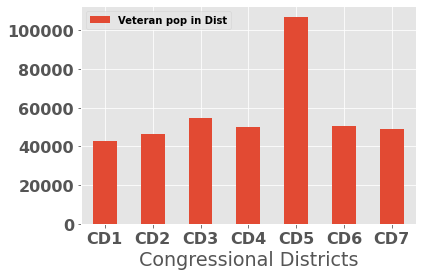

In [1144]:
df = pd.DataFrame({'Congressional Districts':['CD1','CD2','CD3','CD4','CD5','CD6','CD7'], 'Veteran pop in Dist':[42986, 46601, 54857, 49805, 107065, 50706, 48808]})
ax = df.plot.bar(x='Congressional Districts', y='Veteran pop in Dist', rot=0).legend(loc=2, prop={'size':10})

In [782]:
cg1=cg1.T
cg1

,CD1,CD2,CD3,CD4,CD5,CD6,CD7,Total Vet Pop in CO
Veteran pop in Dist,42986.2,46601,54857.6,49804.8,107065,50706,48808.1,400829


In [783]:
cg0=cg1.drop(['Total Vet Pop in CO'], axis =1)
cg0

,CD1,CD2,CD3,CD4,CD5,CD6,CD7
Veteran pop in Dist,42986.2,46601,54857.6,49804.8,107065,50706,48808.1


In [802]:
cg0=cg0.T
cg0


,Veteran pop in Dist
CD1,42986.2
CD2,46601
CD3,54857.6
CD4,49804.8
CD5,107065
CD6,50706
CD7,48808.1


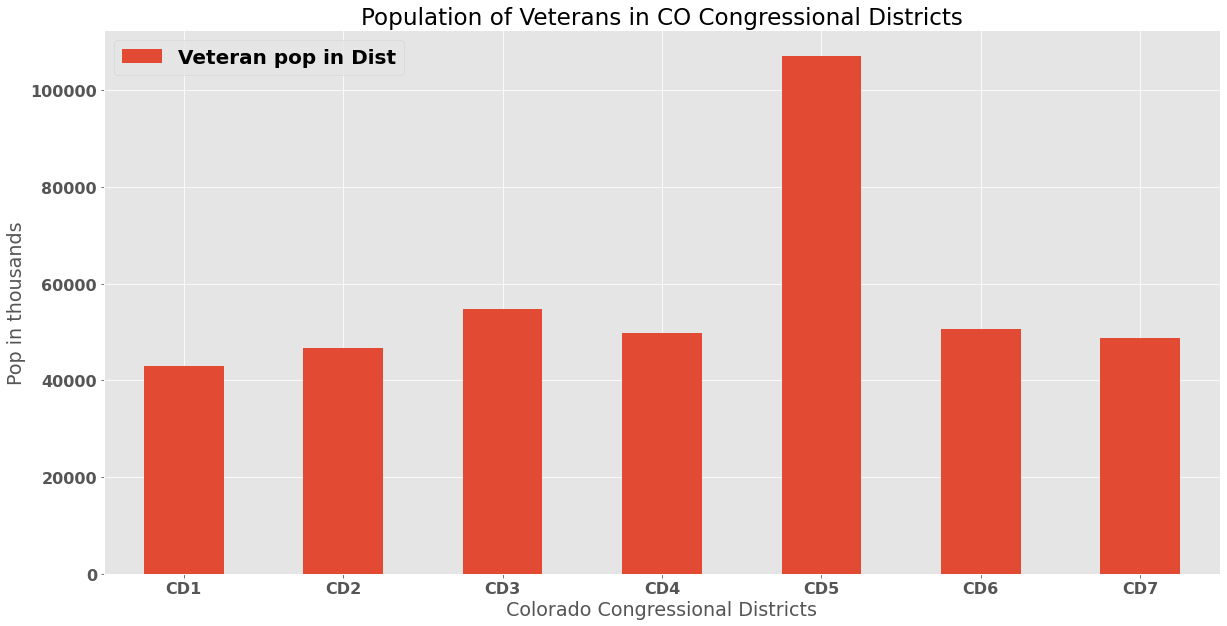

In [1427]:
cg0.plot(kind='bar',figsize=(20,10), title ="Population of Veterans in CO Congressional Districts")

plt.ylabel('Pop in thousands')
plt.xlabel('Colorado Congressional Districts')
plt.xticks(rotation=0, horizontalalignment="center")
plt.legend(loc='upper left', prop={'size':20})
plt.savefig('cg0.png');          

In [811]:
cdf2T_1

Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
Colorado                        5758736.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64

In [812]:
cdf2T

,Population est. for July 2019,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %",Veterans est./2014-2018
"Teller County, Colorado","25,388",93.8%,1.0%,1.4%,1.1%,0.1%,2.6%,7.1%,88.0%,"3,073"
"Denver County, Colorado","727,211",80.9%,9.8%,1.7%,4.1%,0.2%,3.3%,29.3%,54.9%,"29,648"
"Adams County, Colorado","517,421",85.7%,4.0%,2.3%,4.5%,0.2%,3.2%,40.8%,49.0%,"26,733"
"Jefferson County, Colorado","582,881",91.5%,1.5%,1.2%,3.1%,0.1%,2.6%,15.6%,77.7%,"38,191"
"El Paso County, Colorado","720,403",83.3%,6.9%,1.4%,3.1%,0.4%,4.9%,17.7%,68.6%,"83,973"
Colorado,"5,758,736",86.9%,4.6%,1.6%,3.5%,0.2%,3.1%,21.8%,67.7%,"375,746"
United States,"328,239,523",76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%,"18,611,432"


In [813]:
cdf2T_1

Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
Colorado                        5758736.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64

In [816]:
cdf2T=cdf2T.T
cdf2T

,"Teller County, Colorado","Denver County, Colorado","Adams County, Colorado","Jefferson County, Colorado","El Paso County, Colorado",Colorado,United States
Population est. for July 2019,"25,388","727,211","517,421","582,881","720,403","5,758,736","328,239,523"
"White alone, %",93.8%,80.9%,85.7%,91.5%,83.3%,86.9%,76.3%
"Black or African American alone, %",1.0%,9.8%,4.0%,1.5%,6.9%,4.6%,13.4%
"American Indian/Alaska Native alone, %",1.4%,1.7%,2.3%,1.2%,1.4%,1.6%,1.3%
"Asian alone, %",1.1%,4.1%,4.5%,3.1%,3.1%,3.5%,5.9%
"Native Hawaiian/Pacific Islander alone, %",0.1%,0.2%,0.2%,0.1%,0.4%,0.2%,0.2%
"Two or More Races, %",2.6%,3.3%,3.2%,2.6%,4.9%,3.1%,2.8%
"Hispanic/Latino, %",7.1%,29.3%,40.8%,15.6%,17.7%,21.8%,18.5%
"White alone, not Hispanic/Latino, %",88.0%,54.9%,49.0%,77.7%,68.6%,67.7%,60.1%
Veterans est./2014-2018,"3,073","29,648","26,733","38,191","83,973","375,746","18,611,432"


In [819]:
co_ethnic

,Population Numbers
"White, alone",346991
"Black or African American, alone",24846.5
"American Indian/Alaska Native, alone",3237.39
"Asian, alone",5888.92
"Native Hawaiian/Pacific Islander, alone",936.752
"Some other Race, alone",8970.74
Two or more races,9957.55
Hispanic/Latino (of any race),45190.1
"White alone, Not Hispanic/Latino",315014
All Veterans,400829


In [824]:
co_ethT=co_ethnic.T
co_ethT

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone","Some other Race, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino",All Veterans
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014,400829


In [825]:
co_ethT=co_ethT.drop(['All Veterans'], axis=1)
co_ethT

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone","Some other Race, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino"
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014


In [826]:
co_eth=co_ethT.T
co_eth

,Population Numbers
"White, alone",346991
"Black or African American, alone",24846.5
"American Indian/Alaska Native, alone",3237.39
"Asian, alone",5888.92
"Native Hawaiian/Pacific Islander, alone",936.752
"Some other Race, alone",8970.74
Two or more races,9957.55
Hispanic/Latino (of any race),45190.1
"White alone, Not Hispanic/Latino",315014


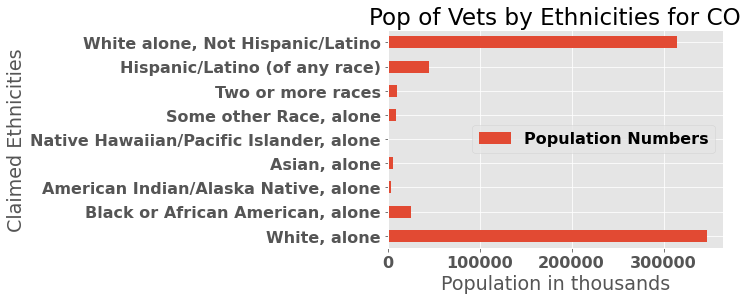

In [1163]:
co_eth.plot(kind='barh',rot=0)

plt.title('Pop of Vets by Ethnicities for CO')
plt.xlabel('Population in thousands')
plt.ylabel('Claimed Ethnicities');

In [845]:
co_ethT=co_eth.T
co_ethT

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone","Some other Race, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino"
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014


In [854]:
co_eth.T.dtypes

White, alone                               object
Black or African American, alone           object
American Indian/Alaska Native, alone       object
Asian, alone                               object
Native Hawaiian/Pacific Islander, alone    object
Some other Race, alone                     object
Two or more races                          object
Hispanic/Latino (of any race)              object
White alone, Not Hispanic/Latino           object
dtype: object

In [856]:
co_ethT=co_eth.T
co_ethT

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone","Some other Race, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino"
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,8970.74,9957.55,45190.1,315014


In [858]:
co_eTh=co_ethT.drop(["Some other Race, alone"],axis=1)
co_eTh

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino"
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,9957.55,45190.1,315014


In [860]:
co_eTh['White/Hispanic/Latino']=co_eTh['White, alone']- co_eTh['White alone, Not Hispanic/Latino']


In [1337]:
co_eth_fixed= co_eTh.drop(['White/Hispanic/Latino'], axis = 1)
co_eth_fixed

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino"
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,9957.55,45190.1,315014


In [1335]:
co_eTh

,"White, alone","Black or African American, alone","American Indian/Alaska Native, alone","Asian, alone","Native Hawaiian/Pacific Islander, alone",Two or more races,Hispanic/Latino (of any race),"White alone, Not Hispanic/Latino",White/Hispanic/Latino
Population Numbers,346991,24846.5,3237.39,5888.92,936.752,9957.55,45190.1,315014,31977.3


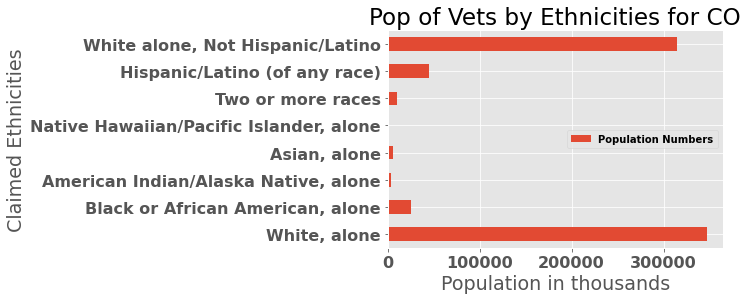

In [1343]:
co_eTh_fixed=co_eth_fixed.T
co_eTh_fixed.plot.barh()
plt.title('Pop of Vets by Ethnicities for CO')
plt.xlabel('Population in thousands')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='best', prop={'size':10});

In [3]:
co_eTh_fixed

NameError: name 'co_eTh_fixed' is not defined

In [2]:
co_eTh_fixed.plot.barh(figsize=(20,10))
plt.title('Pop. of Vets by Ethnicities for CO')
plt.xlabel('Population in thousands')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='center right', prop={'size':20})
plt.savefig('co_eTh_fixed.png');

NameError: name 'co_eTh_fixed' is not defined

In [1423]:
cdf3
plt.savefig('cdf3.png')

<Figure size 432x288 with 0 Axes>

In [905]:
cdf2=cdf2.T


In [908]:
cdf3=cdf2T.T

In [919]:
print(cdf2T_1)

Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
Colorado                        5758736.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64


In [926]:
cdf3T_1=cdf2T_1.drop(['United States'], axis=0)

In [932]:
cdf2T_1

Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
Colorado                        5758736.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64

In [937]:
cdf2T_1


Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
Colorado                        5758736.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64

In [938]:
cdf3T_1=cdf2T_1.drop(["Colorado"], axis=0)

In [939]:
cdf3T_1

Teller County, Colorado           25388.0
Denver County, Colorado          727211.0
Adams County, Colorado           517421.0
Jefferson County, Colorado       582881.0
El Paso County, Colorado         720403.0
United States                 328239523.0
Name: Population est. for July 2019, dtype: float64

In [940]:
cdf3T_1=cdf3T_1.drop(['United States'], axis=0)

In [941]:
cdf3T_1

Teller County, Colorado        25388.0
Denver County, Colorado       727211.0
Adams County, Colorado        517421.0
Jefferson County, Colorado    582881.0
El Paso County, Colorado      720403.0
Name: Population est. for July 2019, dtype: float64

In [942]:
cdf2T_2

Teller County, Colorado       93.8
Denver County, Colorado       80.9
Adams County, Colorado        85.7
Jefferson County, Colorado    91.5
El Paso County, Colorado      83.3
Colorado                      86.9
United States                 76.3
Name: White alone, %, dtype: float64

In [944]:
cdf3T_2=cdf2T_2.drop(['Colorado','United States'],  axis=0)

In [945]:
cdf3T_2

Teller County, Colorado       93.8
Denver County, Colorado       80.9
Adams County, Colorado        85.7
Jefferson County, Colorado    91.5
El Paso County, Colorado      83.3
Name: White alone, %, dtype: float64

In [946]:
cdf2T_3

Teller County, Colorado        1.0
Denver County, Colorado        9.8
Adams County, Colorado         4.0
Jefferson County, Colorado     1.5
El Paso County, Colorado       6.9
Colorado                       4.6
United States                 13.4
Name: Black or African American alone, %, dtype: float64

In [947]:
cdf3T_3=cdf2T_3.drop(['Colorado', 'United States'], axis=0)

In [948]:
cdf3T_3

Teller County, Colorado       1.0
Denver County, Colorado       9.8
Adams County, Colorado        4.0
Jefferson County, Colorado    1.5
El Paso County, Colorado      6.9
Name: Black or African American alone, %, dtype: float64

In [949]:
cdf2T_4

Teller County, Colorado       1.4
Denver County, Colorado       1.7
Adams County, Colorado        2.3
Jefferson County, Colorado    1.2
El Paso County, Colorado      1.4
Colorado                      1.6
United States                 1.3
Name: American Indian/Alaska Native alone, %, dtype: float64

In [950]:
cdf3T_4=cdf2T_4.drop(['Colorado', 'United States'], axis=0)

In [951]:
cdf3T_4

Teller County, Colorado       1.4
Denver County, Colorado       1.7
Adams County, Colorado        2.3
Jefferson County, Colorado    1.2
El Paso County, Colorado      1.4
Name: American Indian/Alaska Native alone, %, dtype: float64

In [952]:
cdf2T_5

Teller County, Colorado       1.1
Denver County, Colorado       4.1
Adams County, Colorado        4.5
Jefferson County, Colorado    3.1
El Paso County, Colorado      3.1
Colorado                      3.5
United States                 5.9
Name: Asian alone, %, dtype: float64

In [953]:
cdf3T_5=cdf2T_5.drop(['Colorado', 'United States'], axis=0)

In [954]:
cdf3T_5

Teller County, Colorado       1.1
Denver County, Colorado       4.1
Adams County, Colorado        4.5
Jefferson County, Colorado    3.1
El Paso County, Colorado      3.1
Name: Asian alone, %, dtype: float64

In [956]:
cdf2T_6

Teller County, Colorado       0.1
Denver County, Colorado       0.2
Adams County, Colorado        0.2
Jefferson County, Colorado    0.1
El Paso County, Colorado      0.4
Colorado                      0.2
United States                 0.2
Name: Native Hawaiian/Pacific Islander alone, %, dtype: float64

In [957]:
cdf3T_6 = cdf2T_6.drop(['Colorado', 'United States'], axis=0)

In [958]:
cdf3T_6

Teller County, Colorado       0.1
Denver County, Colorado       0.2
Adams County, Colorado        0.2
Jefferson County, Colorado    0.1
El Paso County, Colorado      0.4
Name: Native Hawaiian/Pacific Islander alone, %, dtype: float64

In [959]:
cdf2T_7

Teller County, Colorado       2.6
Denver County, Colorado       3.3
Adams County, Colorado        3.2
Jefferson County, Colorado    2.6
El Paso County, Colorado      4.9
Colorado                      3.1
United States                 2.8
Name: Two or More Races, %, dtype: float64

In [960]:
cdf3T_7=cdf2T_7.drop(['Colorado', 'United States'], axis=0)

In [961]:
cdf3T_7

Teller County, Colorado       2.6
Denver County, Colorado       3.3
Adams County, Colorado        3.2
Jefferson County, Colorado    2.6
El Paso County, Colorado      4.9
Name: Two or More Races, %, dtype: float64

In [962]:
cdf2T_8

Teller County, Colorado        7.1
Denver County, Colorado       29.3
Adams County, Colorado        40.8
Jefferson County, Colorado    15.6
El Paso County, Colorado      17.7
Colorado                      21.8
United States                 18.5
Name: Hispanic/Latino, %, dtype: float64

In [963]:
cdf3T_8=cdf2T_8.drop(['Colorado', 'United States'], axis=0)

In [964]:
cdf3T_8

Teller County, Colorado        7.1
Denver County, Colorado       29.3
Adams County, Colorado        40.8
Jefferson County, Colorado    15.6
El Paso County, Colorado      17.7
Name: Hispanic/Latino, %, dtype: float64

In [966]:
cdf2T_9

Teller County, Colorado       88.0
Denver County, Colorado       54.9
Adams County, Colorado        49.0
Jefferson County, Colorado    77.7
El Paso County, Colorado      68.6
Colorado                      67.7
United States                 60.1
Name: White alone, not Hispanic/Latino, %, dtype: float64

In [967]:
cdf3T_9=cdf2T_9.drop(['Colorado', 'United States'], axis=0)

In [968]:
cdf3T_9

Teller County, Colorado       88.0
Denver County, Colorado       54.9
Adams County, Colorado        49.0
Jefferson County, Colorado    77.7
El Paso County, Colorado      68.6
Name: White alone, not Hispanic/Latino, %, dtype: float64

In [977]:
cdf3T=cdf2T.T
cdf3T

,Population est. for July 2019,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %",Veterans est./2014-2018
"Teller County, Colorado","25,388",93.8%,1.0%,1.4%,1.1%,0.1%,2.6%,7.1%,88.0%,"3,073"
"Denver County, Colorado","727,211",80.9%,9.8%,1.7%,4.1%,0.2%,3.3%,29.3%,54.9%,"29,648"
"Adams County, Colorado","517,421",85.7%,4.0%,2.3%,4.5%,0.2%,3.2%,40.8%,49.0%,"26,733"
"Jefferson County, Colorado","582,881",91.5%,1.5%,1.2%,3.1%,0.1%,2.6%,15.6%,77.7%,"38,191"
"El Paso County, Colorado","720,403",83.3%,6.9%,1.4%,3.1%,0.4%,4.9%,17.7%,68.6%,"83,973"
Colorado,"5,758,736",86.9%,4.6%,1.6%,3.5%,0.2%,3.1%,21.8%,67.7%,"375,746"
United States,"328,239,523",76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%,"18,611,432"


In [980]:
cdf3T['White/Hispanic/Latino, %']=cdf3T_2-cdf3T_9

In [983]:
cdf2T_10

Teller County, Colorado           3073.0
Denver County, Colorado          29648.0
Adams County, Colorado           26733.0
Jefferson County, Colorado       38191.0
El Paso County, Colorado         83973.0
Colorado                        375746.0
United States                 18611432.0
Name: Veterans est./2014-2018, dtype: float64

In [985]:
cdf3T_10=cdf2T_10.drop(['Colorado', 'United States'], axis=0)

In [999]:
cdf3T_1

Teller County, Colorado        25388.0
Denver County, Colorado       727211.0
Adams County, Colorado        517421.0
Jefferson County, Colorado    582881.0
El Paso County, Colorado      720403.0
Name: Population est. for July 2019, dtype: float64

In [1000]:
cdf3T_2

Teller County, Colorado       93.8
Denver County, Colorado       80.9
Adams County, Colorado        85.7
Jefferson County, Colorado    91.5
El Paso County, Colorado      83.3
Name: White alone, %, dtype: float64

In [1001]:
cdf3T_3

Teller County, Colorado       1.0
Denver County, Colorado       9.8
Adams County, Colorado        4.0
Jefferson County, Colorado    1.5
El Paso County, Colorado      6.9
Name: Black or African American alone, %, dtype: float64

In [1002]:
cdf3T_4

Teller County, Colorado       1.4
Denver County, Colorado       1.7
Adams County, Colorado        2.3
Jefferson County, Colorado    1.2
El Paso County, Colorado      1.4
Name: American Indian/Alaska Native alone, %, dtype: float64

In [1003]:
cdf3T_5

Teller County, Colorado       1.1
Denver County, Colorado       4.1
Adams County, Colorado        4.5
Jefferson County, Colorado    3.1
El Paso County, Colorado      3.1
Name: Asian alone, %, dtype: float64

In [1004]:
cdf3T_6

Teller County, Colorado       0.1
Denver County, Colorado       0.2
Adams County, Colorado        0.2
Jefferson County, Colorado    0.1
El Paso County, Colorado      0.4
Name: Native Hawaiian/Pacific Islander alone, %, dtype: float64

In [1005]:
cdf3T_7

Teller County, Colorado       2.6
Denver County, Colorado       3.3
Adams County, Colorado        3.2
Jefferson County, Colorado    2.6
El Paso County, Colorado      4.9
Name: Two or More Races, %, dtype: float64

In [1007]:
cdf3T_8

Teller County, Colorado        7.1
Denver County, Colorado       29.3
Adams County, Colorado        40.8
Jefferson County, Colorado    15.6
El Paso County, Colorado      17.7
Name: Hispanic/Latino, %, dtype: float64

In [1008]:
cdf3T_9

Teller County, Colorado       88.0
Denver County, Colorado       54.9
Adams County, Colorado        49.0
Jefferson County, Colorado    77.7
El Paso County, Colorado      68.6
Name: White alone, not Hispanic/Latino, %, dtype: float64

In [1009]:
cdf3T_10

Teller County, Colorado        3073.0
Denver County, Colorado       29648.0
Adams County, Colorado        26733.0
Jefferson County, Colorado    38191.0
El Paso County, Colorado      83973.0
Name: Veterans est./2014-2018, dtype: float64

In [1027]:
data1= [['Adams', 517421],
        ['Denver', 727211], 
        ['Jefferson', 582881], 
        ['El Paso', 720403], 
        ['Teller', 25388]]

cnt1_df=pd.DataFrame(data1, columns=['County Name', 'Population est for July 2019'])
#cnt1_df == cdf3T_1, this data had to do be transformed/re-entered as above

data2=[['Adams',85.7],
        ['Denver', 80.9], 
        ['Jefferson', 91.5], 
        ['El Paso', 83.3], 
        ['Teller', 93.8]]

cnt2_df=pd.DataFrame(data2, columns=['County Name', 'White alone, %'])
#cnt2_df == cdf3T_2

data3= [['Adams', 4.0],
        ['Denver', 9.8], 
        ['Jefferson', 1.5], 
        ['El Paso', 6.9], 
        ['Teller', 1.0]]

cnt3_df=pd.DataFrame(data3, columns=['County Name', 'Black or African American alone, %'])
#cnt3_df == cdf3T_3

data4=[['Adams', 2.3],
        ['Denver', 1.7], 
        ['Jefferson', 1.2], 
        ['El Paso', 1.4], 
        ['Teller', 1.4]]

cnt4_df= pd.DataFrame(data4, columns=['County Name', 'American Indian/Alaska Native alone, %'])
#cnt4_df == cdf3T_4

data5=[['Adams', 4.5],
        ['Denver', 4.1], 
        ['Jefferson', 3.1], 
        ['El Paso', 3.1], 
        ['Teller', 1.1]]

cnt5_df=pd.DataFrame(data5, columns=['County Name', 'Asian alone, %'])
#cnt5_df == cdf3T_5

data6=[['Adams', .2],
        ['Denver', .2], 
        ['Jefferson', .1], 
        ['El Paso', .4], 
        ['Teller', .1]]

cnt6_df=pd.DataFrame(data6,columns=['County Name', 'Native Hawaiian/Pacific Islander alone, %'])
#cnt6_df == cdf3T_6

data7=[['Adams', 3.2],
        ['Denver', 3.3], 
        ['Jefferson', 2.6], 
        ['El Paso', 4.9], 
        ['Teller', 2.6]]

cnt7_df=pd.DataFrame(data7, columns=['County Name', 'Two or More Races, %'])
#cnt7_df == cdf3T_7

data8=[['Adams', 40.8],
        ['Denver', 29.3], 
        ['Jefferson', 15.6], 
        ['El Paso', 17.7], 
        ['Teller', 7.1]]

cnt8_df=pd.DataFrame(data8, columns=['County Name', 'Hispanic/Latino, %'])
#cnt8_df == cdf3T_8

data9=[['Adams', 49.0],
        ['Denver', 54.9], 
        ['Jefferson', 77.7], 
        ['El Paso', 68.6], 
        ['Teller', 88.0]]

cnt9_df=pd.DataFrame(data9, columns=['County Name', 'White alone, not Hispanic/Latino, %'])
#cnt9_df == cdf3T_9

data10=[['Adams', 26733],
        ['Denver', 29648], 
        ['Jefferson', 38191], 
        ['El Paso', 83973], 
        ['Teller', 3073]]

cnt10_df=pd.DataFrame(data10,columns=['County Name', 'Veterans est. 2014-2018'])
#cnt10_df == cdf3T_10


In [1351]:
cnt_vet_merged['Veteran Pop %']= cnt_vet_merged['Veterans est. 2014-2018']/cnt_vet_merged['Population est for July 2019']*100


In [1352]:
cnt_vet_merged

,County Name,Population est for July 2019,Veterans est. 2014-2018,Veteran Pop %
0,Adams,517421,26733,5.166586
1,Denver,727211,29648,4.076946
2,Jefferson,582881,38191,6.552109
3,El Paso,720403,83973,11.656392
4,Teller,25388,3073,12.104144


In [1355]:
new_cnt_vet_percent= cnt_vet_merged[['County Name','Veteran Pop %']].copy()
new_cnt_vet_percent

,County Name,Veteran Pop %
0,Adams,5.166586
1,Denver,4.076946
2,Jefferson,6.552109
3,El Paso,11.656392
4,Teller,12.104144


In [1358]:
new_percent_cnt=new_cnt_vet_percent.T.rename(columns={0:'Adams', 1:'Denver', 2:'Jefferson', 3:'El Paso', 4:'Teller'})
print(new_percent_cnt)

                 Adams   Denver  Jefferson  El Paso   Teller
County Name      Adams   Denver  Jefferson  El Paso   Teller
Veteran Pop %  5.16659  4.07695    6.55211  11.6564  12.1041


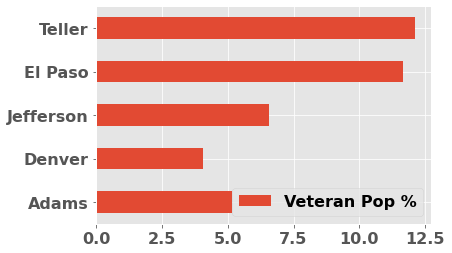

In [1422]:
new_prcnt_cnt=new_percent_cnt.T.drop(['County Name'],axis=1)
new_prcnt_cnt.plot.barh()
plt.legend()
plt.savefig('Vet percent per county.png')

In [1102]:
cnt_vet_merged= pd.merge(cnt1_df, cnt10_df, on=['County Name'])

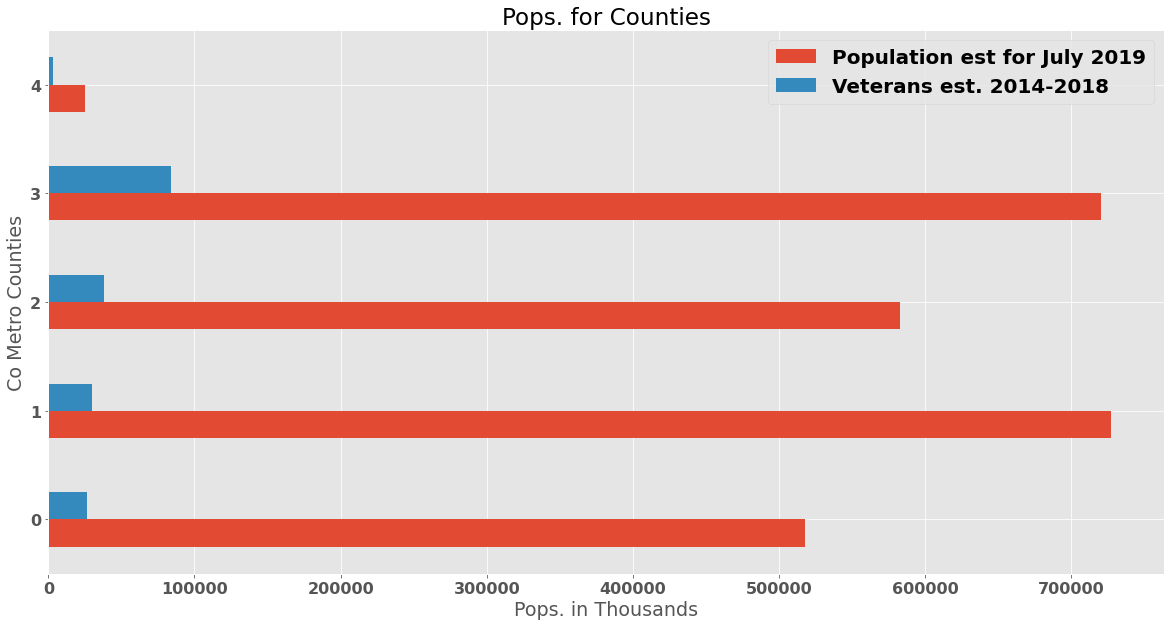

In [1421]:
cnt_vet_unmerge.plot.barh(figsize=(20,10))


plt.title('Pops. for Counties')
plt.xlabel('Pops. in Thousands')
plt.ylabel('Co Metro Counties')
plt.legend(loc='upper right', prop={'size':20})
plt.savefig('Vet Pop for Counties.png');

In [1367]:
cnt_vet_unmerge=cnt_vet_merged.drop(['Veteran Pop %'], axis=1)
cnt_vet_unmerge

,County Name,Population est for July 2019,Veterans est. 2014-2018
0,Adams,517421,26733
1,Denver,727211,29648
2,Jefferson,582881,38191
3,El Paso,720403,83973
4,Teller,25388,3073


In [1036]:
cnt_percent_data=[cnt2_df,cnt3_df, cnt4_df, cnt5_df, cnt6_df, cnt7_df, cnt8_df,cnt9_df]


In [1037]:
cnt_percent_merged = reduce(lambda  left,right: pd.merge(left,right,on=['County Name'],
                                            how='outer'), cnt_percent_data)

In [1038]:
cnt_percent_merged

,County Name,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %"
0,Adams,85.7,4.0,2.3,4.5,0.2,3.2,40.8,49.0
1,Denver,80.9,9.8,1.7,4.1,0.2,3.3,29.3,54.9
2,Jefferson,91.5,1.5,1.2,3.1,0.1,2.6,15.6,77.7
3,El Paso,83.3,6.9,1.4,3.1,0.4,4.9,17.7,68.6
4,Teller,93.8,1.0,1.4,1.1,0.1,2.6,7.1,88.0


In [1238]:
cnt_percent_merged1=cnt_percent_merged.T.rename(columns={0:'Adams',1:'Denver', 2:'Jefferson', 3:'El Paso', 4:'Teller'})
cnt_percent_merged1

,Adams,Denver,Jefferson,El Paso,Teller
County Name,Adams,Denver,Jefferson,El Paso,Teller
"White alone, %",85.7,80.9,91.5,83.3,93.8
"Black or African American alone, %",4,9.8,1.5,6.9,1
"American Indian/Alaska Native alone, %",2.3,1.7,1.2,1.4,1.4
"Asian alone, %",4.5,4.1,3.1,3.1,1.1
"Native Hawaiian/Pacific Islander alone, %",0.2,0.2,0.1,0.4,0.1
"Two or More Races, %",3.2,3.3,2.6,4.9,2.6
"Hispanic/Latino, %",40.8,29.3,15.6,17.7,7.1
"White alone, not Hispanic/Latino, %",49,54.9,77.7,68.6,88


In [1239]:
cnt_percent_merged1=cnt_percent_merged1.T.drop(['County Name'], axis = 1)

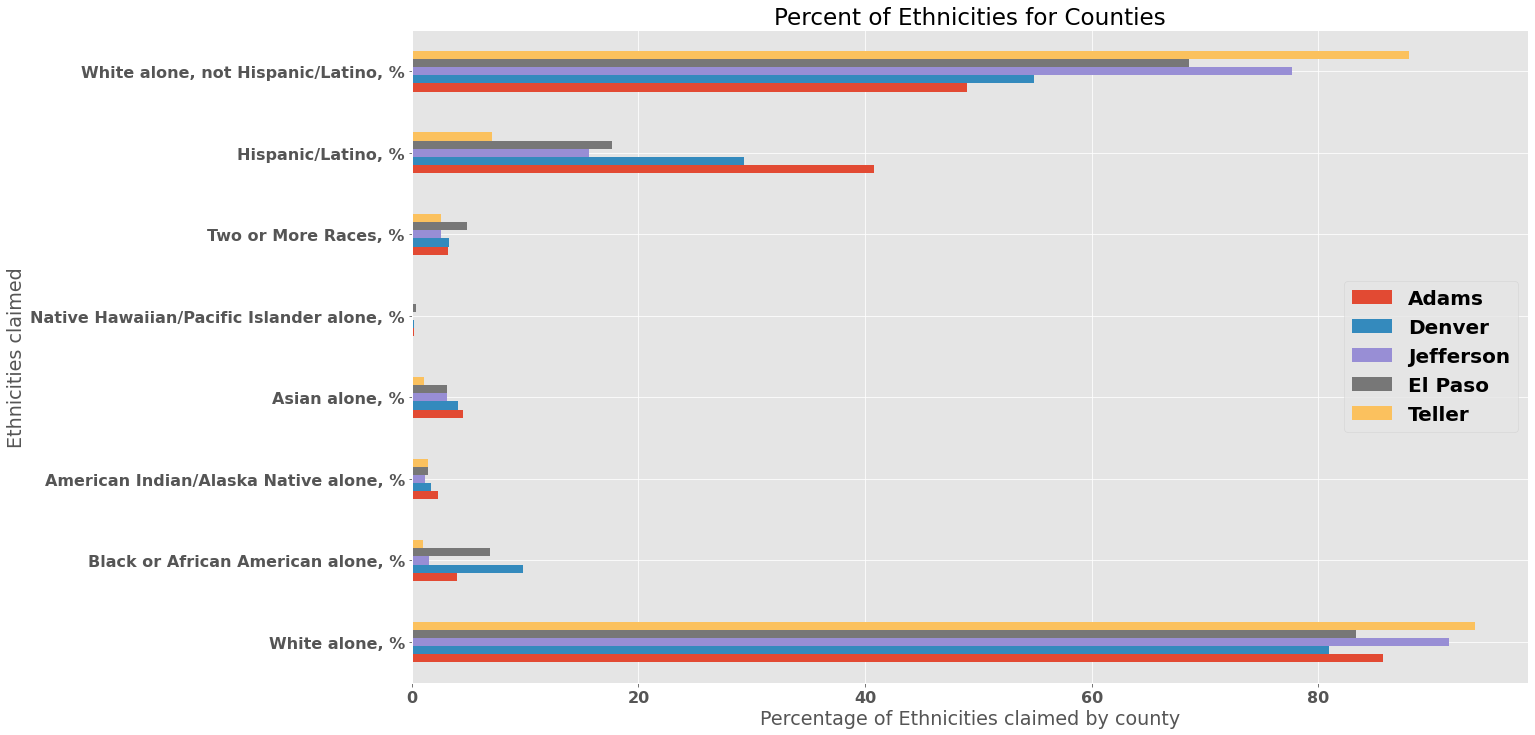

In [1414]:
cnt_percent_merg1=cnt_percent_merged1.T
cnt_percent_merg1.plot.barh(figsize=(20,12))


plt.title('Percent of Ethnicities for Counties')
plt.xlabel('Percentage of Ethnicities claimed by county')
plt.ylabel('Ethnicities claimed')


plt.legend(loc='best', prop={'size':20})
plt.savefig('~cnt_percent_merg1.png');

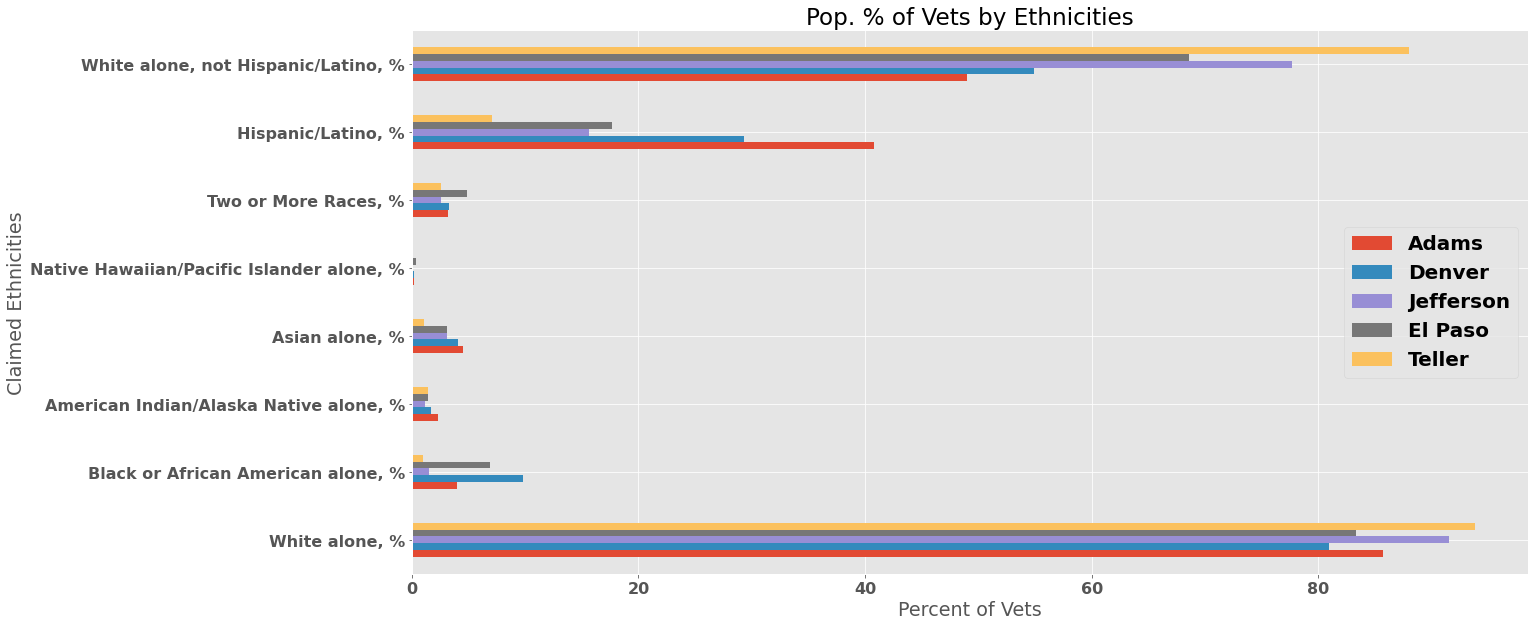

In [1405]:
cnt_percent_merg1.plot.barh(figsize=(20,10))

plt.title('Pop. % of Vets by Ethnicities')
plt.xlabel('Percent of Vets')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='best', prop={'size':20})
plt.savefig('cnt_percent_merg1.png');

In [1262]:
cnt_percent_merged

,County Name,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %"
0,Adams,85.7,4.0,2.3,4.5,0.2,3.2,40.8,49.0
1,Denver,80.9,9.8,1.7,4.1,0.2,3.3,29.3,54.9
2,Jefferson,91.5,1.5,1.2,3.1,0.1,2.6,15.6,77.7
3,El Paso,83.3,6.9,1.4,3.1,0.4,4.9,17.7,68.6
4,Teller,93.8,1.0,1.4,1.1,0.1,2.6,7.1,88.0


In [1112]:
us_percent=pd.read_csv('~/Downloads/QuickFacts Oct-28-2020.csv')

In [1157]:
us_avg=us_percent.loc[[8,9,10,11,12,13,14,15]]
us_avg

,Fact,Fact Note,United States,Value Note for United States
8,"White alone, percent",NaN,76.3%,NaN
9,"Black or African American alone, percent",(a),13.4%,NaN
10,"American Indian and Alaska Native alone, percent",(a),1.3%,NaN
11,"Asian alone, percent",(a),5.9%,NaN
12,Native Hawaiian and Other Pacific Islander alo...,(a),0.2%,NaN
13,"Two or More Races, percent",NaN,2.8%,NaN
14,"Hispanic or Latino, percent",(b),18.5%,NaN
15,"White alone, not Hispanic or Latino, percent",NaN,60.1%,NaN


In [1158]:
us_eth_avg=us_avg.reset_index().drop(['index', 'Fact Note', 'Value Note for United States'],axis=1)
us_eth_avg

,Fact,United States
0,"White alone, percent",76.3%
1,"Black or African American alone, percent",13.4%
2,"American Indian and Alaska Native alone, percent",1.3%
3,"Asian alone, percent",5.9%
4,Native Hawaiian and Other Pacific Islander alo...,0.2%
5,"Two or More Races, percent",2.8%
6,"Hispanic or Latino, percent",18.5%
7,"White alone, not Hispanic or Latino, percent",60.1%


In [1159]:
us_eth_avg=us_eth_avg.T
us_eth_avg

,0,1,2,3,4,5,6,7
Fact,"White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent"
United States,76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%


In [1161]:
us_eth_avg1=us_eth_avg.rename(columns={0:'White alone, %', 1:'Black or African American alone, %', 2:'American Indian/Alaska Native alone, %', 3:'Asian alone, %', 4:'Native Hawaiian/Pacific Islander alone, %', 5:'Two or More Races, %', 6:'Hispanic/Latino, %', 7: 'White alone, not Hispanic/Latino, %'})
us_eth_avg1

,"White alone, %","Black or African American alone, %","American Indian/Alaska Native alone, %","Asian alone, %","Native Hawaiian/Pacific Islander alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, not Hispanic/Latino, %"
Fact,"White alone, percent","Black or African American alone, percent","American Indian and Alaska Native alone, percent","Asian alone, percent",Native Hawaiian and Other Pacific Islander alo...,"Two or More Races, percent","Hispanic or Latino, percent","White alone, not Hispanic or Latino, percent"
United States,76.3%,13.4%,1.3%,5.9%,0.2%,2.8%,18.5%,60.1%


In [1162]:
us_eth_avg1=us_eth_avg1.T.drop(['Fact'], axis=1)
us_eth_avg1

,United States
"White alone, %",76.3%
"Black or African American alone, %",13.4%
"American Indian/Alaska Native alone, %",1.3%
"Asian alone, %",5.9%
"Native Hawaiian/Pacific Islander alone, %",0.2%
"Two or More Races, %",2.8%
"Hispanic/Latino, %",18.5%
"White alone, not Hispanic/Latino, %",60.1%


In [1164]:
us_eth_1=us_eth_avg1['United States'].str.replace(r'%', r'').astype('float')
us_eth_1

White alone, %                               76.3
Black or African American alone, %           13.4
American Indian/Alaska Native alone, %        1.3
Asian alone, %                                5.9
Native Hawaiian/Pacific Islander alone, %     0.2
Two or More Races, %                          2.8
Hispanic/Latino, %                           18.5
White alone, not Hispanic/Latino, %          60.1
Name: United States, dtype: float64

In [1273]:
def replace_percent_float(df, str):
    df = df[str].str.replace(r'%', r'').astype('float')
    #us_eth_avg2=us_eth_avg2['United States'].str.replace(r'%', r'').astype('float')
    return df

In [1274]:
co_df_cos=replace_percent_float(co_df1, 'Colorado Springs')
co_df_cos

White alone, %                                78.3
Black or African American, alone, %            6.2
American Indian/Alaska Native, alone, %        0.7
Asian, alone, %                                3.0
Native Hawaiian/Pacific Islander, alone, %     0.3
Two or more races, %                           6.0
Hispanic/Latino (of any race), %              17.7
White alone, Not Hispanic/Latino, %           68.7
Name: Colorado Springs, dtype: float64

In [1275]:
co_df_co=replace_percent_float(co_df1, 'Colorado')
co_df_co

White alone, %                                86.9
Black or African American, alone, %            4.6
American Indian/Alaska Native, alone, %        1.6
Asian, alone, %                                3.5
Native Hawaiian/Pacific Islander, alone, %     0.2
Two or more races, %                           3.1
Hispanic/Latino (of any race), %              21.8
White alone, Not Hispanic/Latino, %           67.7
Name: Colorado, dtype: float64

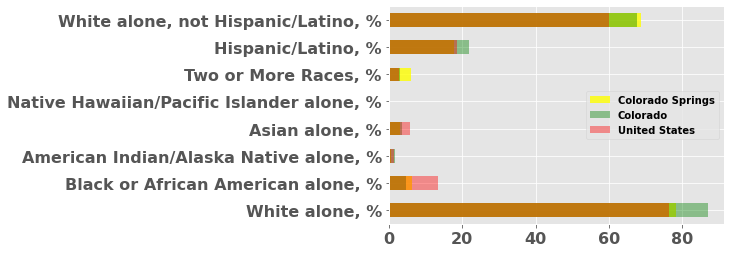

In [1276]:
ax=co_df_cos.plot.barh(color='yellow' ,alpha=.8)
co_df_co.plot.barh(color= 'green', ax=ax, alpha=.4)
us_eth_1.plot.barh(color='r' ,ax=ax ,alpha=.4)

plt.legend(loc='best', prop={'size':10});

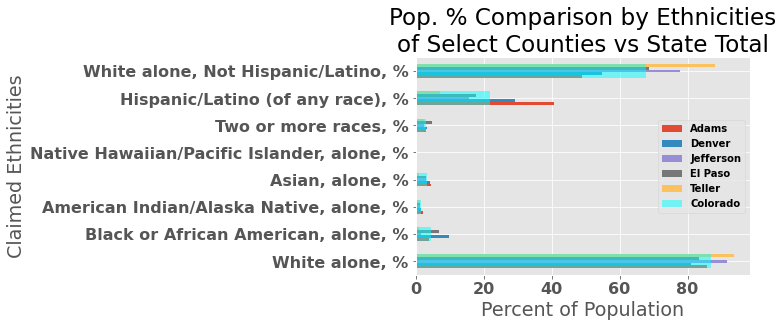

In [1389]:
ax= cnt_percent_merg1.plot.barh(alpha=1)
co_df_co.plot.barh( ax=ax, color='cyan',alpha=.5)

plt.title('Pop. % Comparison by Ethnicities\nof Select Counties vs State Total')
plt.xlabel('Percent of Population')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='best', prop={'size':10});

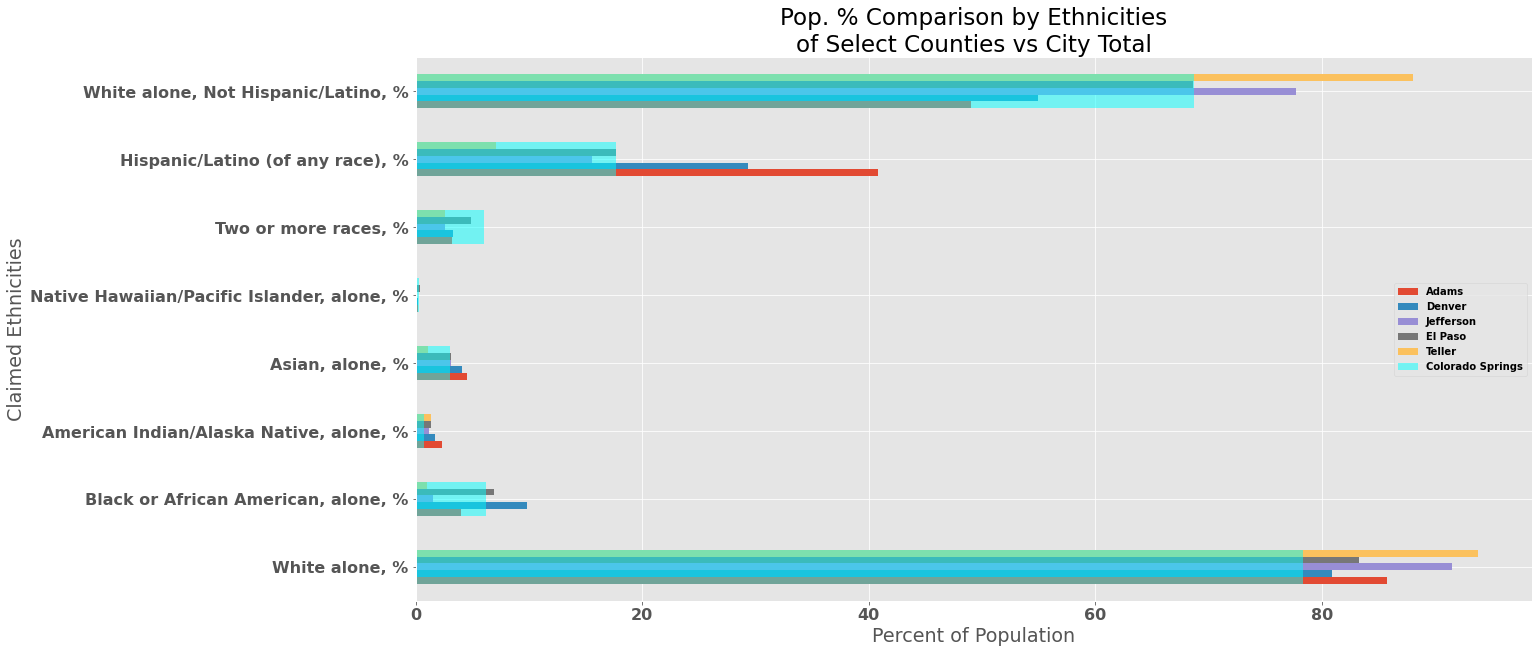

In [1420]:
ax= cnt_percent_merg1.plot.barh(figsize=(20,10), alpha=1)
co_df_cos.plot.barh( figsize=(20,10),ax=ax, color='cyan',alpha=.5)

plt.title('Pop. % Comparison by Ethnicities\nof Select Counties vs City Total')
plt.xlabel('Percent of Population')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='best', prop={'size':10});

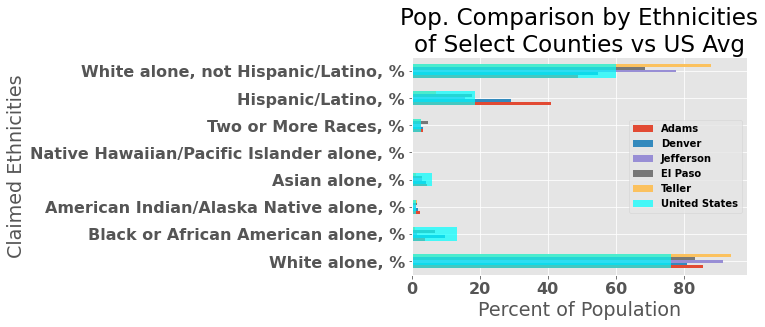

In [1288]:
ax= cnt_percent_merg1.plot.barh(alpha=1)
us_eth_1.plot.barh( ax=ax, color='cyan',alpha=.7)

plt.title('Pop. Comparison by Ethnicities\nof Select Counties vs US Avg')
plt.xlabel('Percent of Population')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='best', prop={'size':10});

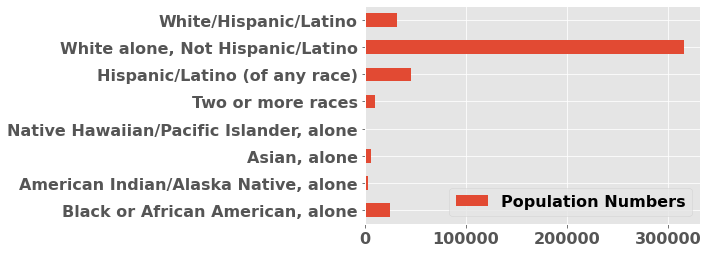

In [1309]:
co_eTh1.plot.barh(stacked=True);

In [1310]:
us_eTh1_data= [['White alone, %',76.3],
               ['Black or African American, alone, %', 13.4],
               ['American Indian/Alaska Native, alone, %', 1.3],
               ['Asian, alone, %', 5.9],
               ['Native Hawaiian/Pacific Islander, alone, %',0.2],
               ['Two or More Races, %',2.8],
               ['Hispanic/Latino, %',18.5],
               ['White alone, Not Hispanic/Latino, %',60.1]]

us_eTh1_df=pd.DataFrame(us_eTh1_data, columns=['Ethnicities', 'United States'])

co_df_cos_data = [['White alone, %',78.3],
                  ['Black or African American, alone, %',6.2],
                  ['American Indian/Alaska Native, alone, %',0.7],
                  ['Asian, alone, %',3.0],
                  ['Native Hawaiian/Pacific Islander, alone, %',0.3],
                  ['Two or More Races, %',6.0],
                  ['Hispanic/Latino, %',17.7],
                  ['White alone, Not Hispanic/Latino, %',68.7]]

co_cos_df=pd.DataFrame(co_df_cos_data, columns=['Ethnicities', 'Colorado Springs'])

co_CO_data=    [['White alone, %',86.9],
                ['Black or African American, alone, %',4.6],
                ['American Indian/Alaska Native, alone, %',1.6],
                ['Asian, alone, %',3.5],
                ['Native Hawaiian/Pacific Islander, alone, %',0.2],
                ['Two or More Races, %',3.1],
                ['Hispanic/Latino, %', 21.8],
                ['White alone, Not Hispanic/Latino, %',67.7]]

co_CO_df=pd.DataFrame(co_CO_data, columns=['Ethnicities', 'Colorado'])


all_avg_data=[co_CO_df, co_cos_df, us_eTh1_df]
all_avgs_df = reduce(lambda  left,right: pd.merge(left,right,on=['Ethnicities'],
                                            how='outer'), all_avg_data)

print(all_avgs_df)


                                  Ethnicities  Colorado  Colorado Springs  \
0                              White alone, %      86.9              78.3   
1         Black or African American, alone, %       4.6               6.2   
2     American Indian/Alaska Native, alone, %       1.6               0.7   
3                             Asian, alone, %       3.5               3.0   
4  Native Hawaiian/Pacific Islander, alone, %       0.2               0.3   
5                        Two or More Races, %       3.1               6.0   
6                          Hispanic/Latino, %      21.8              17.7   
7         White alone, Not Hispanic/Latino, %      67.7              68.7   

   United States  
0           76.3  
1           13.4  
2            1.3  
3            5.9  
4            0.2  
5            2.8  
6           18.5  
7           60.1  


In [1317]:
all_avgs_dfT=all_avgs_df.T
all_avgs_dfT

,0,1,2,3,4,5,6,7
Ethnicities,"White alone, %","Black or African American, alone, %","American Indian/Alaska Native, alone, %","Asian, alone, %","Native Hawaiian/Pacific Islander, alone, %","Two or More Races, %","Hispanic/Latino, %","White alone, Not Hispanic/Latino, %"
Colorado,86.9,4.6,1.6,3.5,0.2,3.1,21.8,67.7
Colorado Springs,78.3,6.2,0.7,3,0.3,6,17.7,68.7
United States,76.3,13.4,1.3,5.9,0.2,2.8,18.5,60.1


In [1318]:
all_avgs_dfT =all_avgs_df.T.rename(columns={
                    0:'White alone, %', 
                    1:'Black or African American, alone, %', 
                    2:'American Indian/Alaska Native, alone, %', 
                    3:'Asian, alone, %', 
                    4:'Native Hawaiian/Pacific Islander, alone, %', 
                    5:'Two or More Races, %',
                    6:'Hispanic/Latino, %', 
                    7:'White alone, Not Hispanic/Latino, %'})

all_avg_df=all_avgs_dfT.T.drop(['Ethnicities'],axis=1)
print(all_avg_df)

                                           Colorado Colorado Springs  \
White alone, %                                 86.9             78.3   
Black or African American, alone, %             4.6              6.2   
American Indian/Alaska Native, alone, %         1.6              0.7   
Asian, alone, %                                 3.5                3   
Native Hawaiian/Pacific Islander, alone, %      0.2              0.3   
Two or More Races, %                            3.1                6   
Hispanic/Latino, %                             21.8             17.7   
White alone, Not Hispanic/Latino, %            67.7             68.7   

                                           United States  
White alone, %                                      76.3  
Black or African American, alone, %                 13.4  
American Indian/Alaska Native, alone, %              1.3  
Asian, alone, %                                      5.9  
Native Hawaiian/Pacific Islander, alone, %           0.2

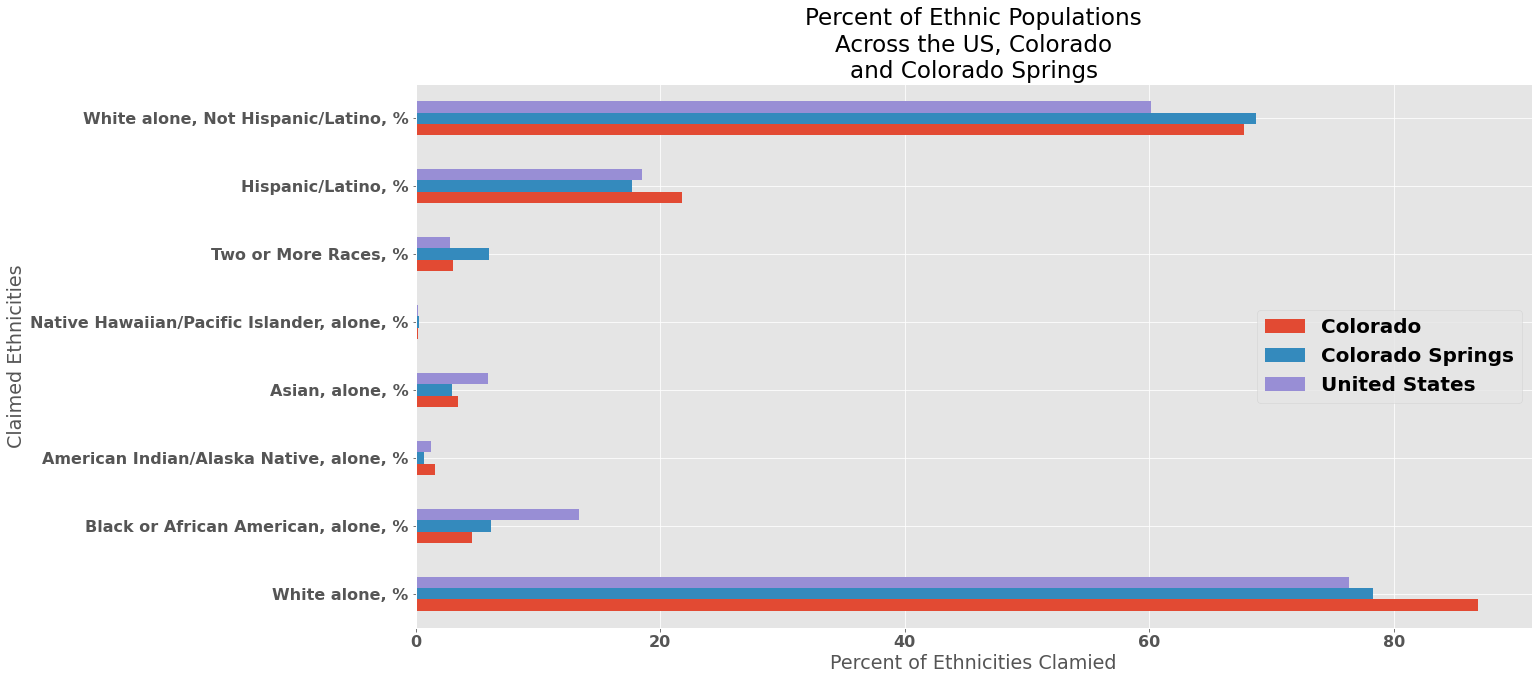

In [1403]:
all_avg_df.plot.barh(figsize=(20,10))
#cnt_percent_merg1.plot.barh(ax=ax, figsize=(20,10),alpha=.5)
#co_eTh_fixed.plot.barh(ax=ax, figsize=(20,10))
plt.title('Percent of Ethnic Populations\nAcross the US, Colorado\nand Colorado Springs')
plt.xlabel('Percent of Ethnicities Clamied')
plt.ylabel('Claimed Ethnicities')
plt.legend(loc='center right', prop={'size':20});
